## Context

## The Data
We will be using the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

___
## Tasks

***1- Perform the Data Preprocessing***

***2- Perform EDA***

***3- Standardize the variables***

***4- Fit the SVM classifier on the dataset***

***5- Perform Predictions and Evaluations***

***6- Using a confusion Matrix, check model's accuracy***

***7- Perform the SVM Hyperparameter Tuning using GridSearchCV***

***8- Retrain the model***

***9- Repeat step 6.***


___
## Recommended methodology

***You will be using sklearn's SVM Classifier `from sklearn.svm import SVC`.***

***For Model evaluation, you can use `from sklearn.metrics import classification_report,confusion_matrix`***

***For GridSearch, you can use `from sklearn.model_selection import GridSearchCV`***

___

***Things to do***
- Perform the data pre-processing.
- Deal with missing values
- Perform EDA
- Using `StandardScalar` standardize the variables expect the taregt variable
- Convert the scaled features to a dataframe
- Split into training and testing set
- Fit SVM classifier
- Using a confusion Matrix, check model's accuracy
- Perform the SVM Hyperparameter Tuning using GridSearchCV
- Retrain the model
- Repeat step 6.

***What will be new***
- You will learn the SVM classifier and how it works.
- How to tune the hyperparameter using GridSearchCV
 
***What will be tricky***
- SVM Hyperparameter Tuning using GridSearchCV will be tricky in this project. What you can do is:

Follow this tutorial:

[How to tune hyperparameter using GridSearchCV in Python](https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/)


In [75]:
import seaborn as sns
import pandas as pd

iris = sns.load_dataset('iris')

In [76]:
# tranfor iris array into a dataframe, for convenience

iris = pd.DataFrame(iris,columns=['sepal_length','sepal_width','petal_length','petal_width', 'species']  )
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Standardise the data set

In [77]:
# lets standardize the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# separate the data from the target attributes
X = iris[['sepal_length', 'sepal_width','petal_length','petal_width']]
y = iris['species']

# Get column names first (provided data was organised this way)
names = ['sepal_length','sepal_width','petal_length','petal_width']   

# standardize the data attributes
scaler = preprocessing.StandardScaler()
iris = scaler.fit_transform(X)

# save as pandas datagrame
iris = pd.DataFrame(iris, columns=names)
iris = pd.concat((iris,y),axis=1)                # add the column with string values
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


### EDA

In [78]:
# is it better to perform EDA before standardisation of dataset?

C:\Users\delchain_default\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


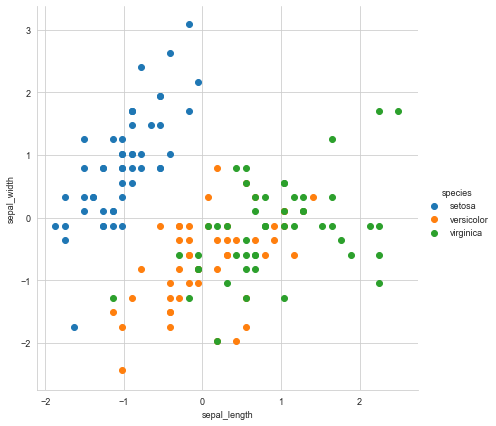

In [79]:
sns.set_style('whitegrid')

sns.FacetGrid(iris,hue='species',size=6).map(plt.scatter,'sepal_length','sepal_width').add_legend()
plt.show();

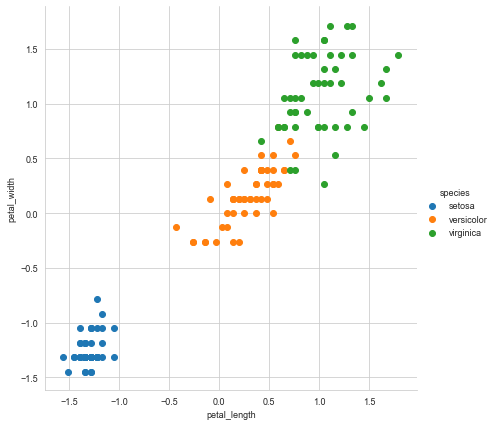

In [80]:
sns.set_style('whitegrid')

sns.FacetGrid(iris,hue='species',size=6).map(plt.scatter,'petal_length','petal_width').add_legend()
plt.show();

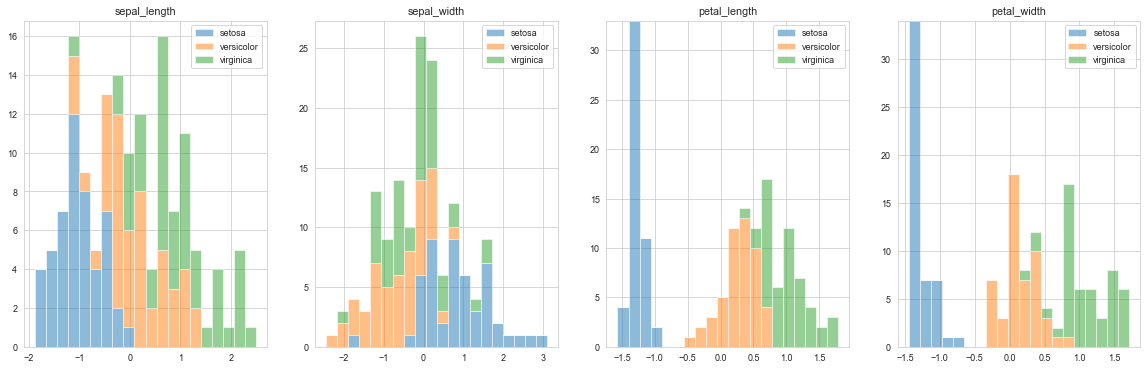

In [81]:
features_mean=list(iris.columns[0:4])

# split dataframe into 4 based on label
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']


#Stack the data
plt.rcParams.update({'font.size': 9})
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
   
    ax.hist([setosa[features_mean[idx]],versicolor[features_mean[idx]],virginica[features_mean[idx]]], bins=20, alpha=0.5,stacked=True, label=['setosa','versicolor','virginica'],color=['tab:blue','tab:orange','tab:green'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])


## Machine Learning

### Preparation

In [82]:
# separate the data from the target attributes
X = iris[['sepal_length', 'sepal_width','petal_length','petal_width']]
y = iris['species']

In [83]:
from sklearn.model_selection import train_test_split

# Prepare the test / train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### SVM 

In [84]:

from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_test = round(svc.score(X_test, y_test) * 100, 2)

print("Train Accuracy: ",svc_train)
print("Test Accuracy: ", svc_test)




Train Accuracy:  96.67
Test Accuracy:  96.67


In [85]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Perform the SVM Hyperparameter Tuning using GridSearchCV

In [86]:
# is GridSearchCV method transposable to other models, or is it specific to SVM?

https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29
    

SyntaxError: invalid syntax (<ipython-input-86-22d59765bbf6>, line 3)

In [87]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

#A function which returns the corresponding SVC model

def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=3, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [88]:
for i in range(4):

# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)

    # Make prediction
    y_pred = svclassifier.predict(X_test)

    # Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Evaluation: RBF kernel
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.92      0.85      0.88      

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [91]:
print(grid.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [92]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Applying K-Mean Clustering

In [107]:

iris = sns.load_dataset('iris')
iris = pd.DataFrame(iris,columns=['sepal_length','sepal_width','petal_length','petal_width', 'species']  )

X = iris[['sepal_length', 'sepal_width']]



In [108]:

from sklearn.cluster import KMeans

inertia = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=15,max_iter=500)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [109]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X)
    silhouette[i] = silhouette_score(X, kmeans.labels_, metric='euclidean')

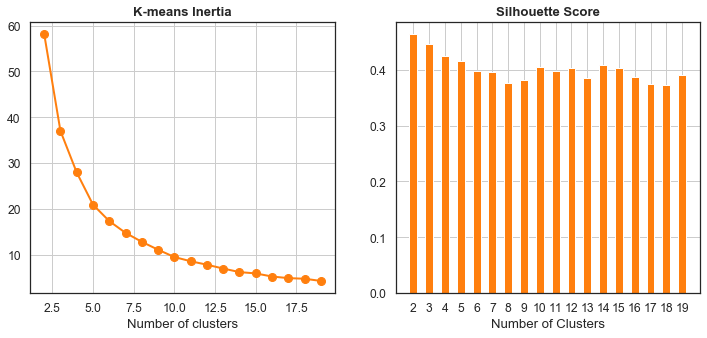

In [111]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='tab:orange')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'tab:orange',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid(True)
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

In [112]:

# Number of clusters
kmeans = KMeans(n_clusters=3)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

print(centroids)

[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]


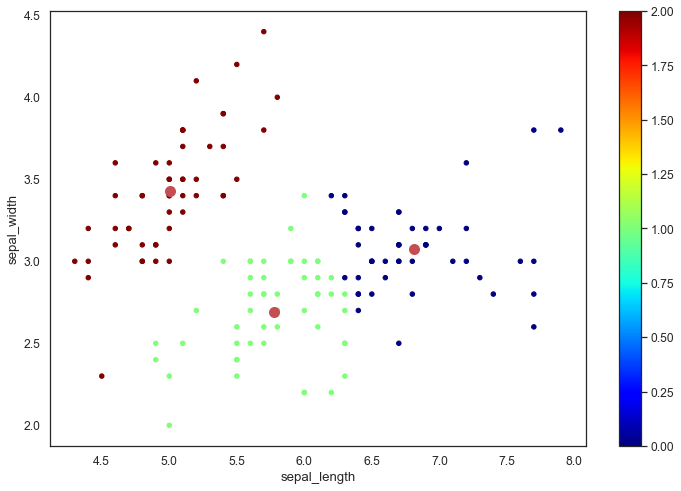

In [115]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 15)
kmeans = kmeans.fit(X)

# creating the centroids df
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))

# creating the plot
fig, ax = plt.subplots(1, 1)
iris.plot.scatter(x = 'sepal_length', y = 'sepal_width', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'sepal_length', y = 'sepal_width', ax = ax,  s = 100, mark_right=False, c='r')